# **Online Retail**

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

download the dataset = https://archive.ics.uci.edu/static/public/352/online+retail.zip

you can import data by installing ucimlrepo module :
**`pip install ucimlrepo`**

### **Import Libraries**

In [43]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score

### **Preparing Data**

In [3]:
# get data from module ucimlrepo
online_retail = fetch_ucirepo(id=352) 

use keys() method to know what online_retail give us!

In [4]:
online_retail.keys()

dict_keys(['data', 'metadata', 'variables'])

In [6]:
online_retail["data"].keys()

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])

In [16]:
online_retail["variables"]

,name,role,type,demographic,description,units,missing_values
0,InvoiceNo,ID,Categorical,None,a 6-digit integral number uniquely assigned to...,None,no
1,StockCode,ID,Categorical,None,a 5-digit integral number uniquely assigned to...,None,no
2,Description,Feature,Categorical,None,product name,None,no
3,Quantity,Feature,Integer,None,the quantities of each product (item) per tran...,None,no
4,InvoiceDate,Feature,Date,None,the day and time when each transaction was gen...,None,no
5,UnitPrice,Feature,Continuous,None,product price per unit,sterling,no
6,CustomerID,Feature,Categorical,None,a 5-digit integral number uniquely assigned to...,None,no
7,Country,Feature,Categorical,None,the name of the country where each customer re...,None,no


In [14]:
online_retail["data"]["original"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


remove unnecessery columns 

In [35]:
df = online_retail["data"]["original"]
df = df.drop(["InvoiceNo","StockCode","Description","CustomerID","Country"],axis=1)
df.head()

,Quantity,InvoiceDate,UnitPrice
0,6,12/1/2010 8:26,2.55
1,6,12/1/2010 8:26,3.39
2,8,12/1/2010 8:26,2.75
3,6,12/1/2010 8:26,3.39
4,6,12/1/2010 8:26,3.39


lets convert InvoiceDate to format which can read by sklearn models 

In [36]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [37]:
df["year"] = df["InvoiceDate"].dt.year
df["month"] = df["InvoiceDate"].dt.month
df["day"] = df["InvoiceDate"].dt.day
df.head()

,Quantity,InvoiceDate,UnitPrice,year,month,day
0,6,2010-12-01 08:26:00,2.55,2010,12,1
1,6,2010-12-01 08:26:00,3.39,2010,12,1
2,8,2010-12-01 08:26:00,2.75,2010,12,1
3,6,2010-12-01 08:26:00,3.39,2010,12,1
4,6,2010-12-01 08:26:00,3.39,2010,12,1


now we have year,month and day sepratly lets remove **InvoiceDate** column

In [38]:
df = df.drop(columns=["InvoiceDate"])
df.head()

,Quantity,UnitPrice,year,month,day
0,6,2.55,2010,12,1
1,6,3.39,2010,12,1
2,8,2.75,2010,12,1
3,6,3.39,2010,12,1
4,6,3.39,2010,12,1


let s Normalize the data for better performace of model 

In [40]:
transformer = ColumnTransformer(
    transformers=[
        ["numerical",Normalizer(),df.columns]
    ],
    remainder="passthrough",
)

tranformed_X = transformer.fit_transform(df)

In [41]:
tranformed_X

array([[2.98500536e-03, 1.26862728e-03, 9.99976796e-01, 5.97001072e-03,
        4.97500893e-04],
       [2.98500352e-03, 1.68652699e-03, 9.99976178e-01, 5.97000703e-03,
        4.97500586e-04],
       [3.97999283e-03, 1.36812254e-03, 9.99973199e-01, 5.96998925e-03,
        4.97499104e-04],
       ...,
       [1.98899667e-03, 2.06358405e-03, 9.99968076e-01, 5.96699001e-03,
        4.47524251e-03],
       [1.98899667e-03, 2.06358405e-03, 9.99968076e-01, 5.96699001e-03,
        4.47524251e-03],
       [1.49174745e-03, 2.46138329e-03, 9.99968041e-01, 5.96698980e-03,
        4.47524235e-03]], shape=(541909, 5))

### **Training Model**

**lets first use KMeans Algorithm and check evaluation score and then try with DBSCAN**

let first estimate how many cluster the data is need for KMeans by using elbow method

In [44]:
wcss = []

for i in range(1,11) : 
    model = KMeans(n_clusters=i,init="k-means++",n_init=12,max_iter=300)
    model.fit(tranformed_X)
    print(model.inertia_)
    wcss.append(model.inertia_)

344.29153455853105
258.4512435031941
179.8493783079361
144.24224208223185
111.48096205718977
91.05844890550897
74.27558013454473
66.20013844165783
59.512036000435515
52.62721036242732


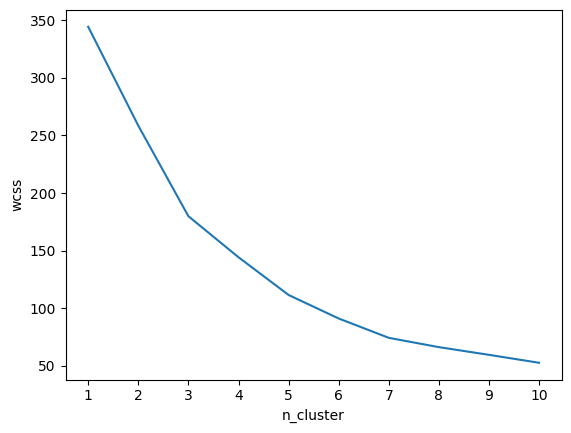

In [46]:
plt.plot(range(1,11),wcss)
plt.xlabel("n_cluster")
plt.ylabel("wcss")
plt.xticks(range(1,11))
plt.show()

so elbow method estimate that we have 3 clusters lets create out model

In [47]:
k_mean_model = KMeans(n_clusters=3,init="k-means++",n_init=12,max_iter=300)
k_mean_model.fit(tranformed_X)

,n_clusters,3
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


let evaluate the model with **silhouette_score**

In [ ]:
silhouette_score(tranformed_X,k_mean_model.labels_)